Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для 2017 года.

Необходимо изучить данные, выполнеть предобработку данных, осуществить исследовательский анализ данных, составьте портрет пользователя каждого региона, проверить следующие гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [1]:
import pandas as pd#подключение библиотеки pandas
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')#чтение файла и вывод первых 10 строк
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()#проверка типов данных в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data['Name'].unique()#поиск уникальных значений в названии игр

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Данные имеют пропуски, неверный тип данных, разный регистр названия колонок, нетипичные значения. 

In [5]:
data.columns = data.columns.str.lower()#запись в нижнем регистре

In [6]:
data.isna().sum()# поиск пропущенных значений и их сумма

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Столбец 'name' имеет два пропуска, заменить пропущенные значения невозможно, т.к. это название игры, значит лучше удалить для корректной статистики. Столбец 'year_of_release' имеет 269 пропусков, предлагаю удалить, чтобы не было нелогичного установления года выпуска. Скорее всего могли возникнуть потому что забыли указать данные или точная дата выхода игры точно не определена. 'genre' имеет 2 пропуска, установить значение невожможно, следует также удалить, скорее всего забыли указать или не смогли определить жанр. 'critic_score' имеет 8578 пропусков, большое значение, просто удалить нельзя, возможно, появились вследствии отсутствия оценок, либо это новые игры, не успевшие получить оценки. 'user_score' имеет 6701 пропуск, ситуация аналогичная с 'critic_score'. 'rating' имеет 6766 пропусков, значительное количество, понять возрастное ограничение невозможно самостоятельно.

In [7]:
data[['year_of_release', 'critic_score']] = data[['year_of_release', 'critic_score']].astype('Int64')

'year_of_release', 'critic_score' имеет неверный тип данных, года и оценки критиков выражаются целыми числами.

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score имеется значение tbd, формат ячейки object. По общему содержанию, а так же по описанию столбца (оценка пользователей (максимум 10)) тип данных должен быть float. Поэтому данное значение (tbd) можно признать пустым и изменить на NaN.

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'].unique()
data['user_score'] = data['user_score'].astype('float')

'user_score' имеет неверный формат, данный даны дробными числами, значит, перевести нужно в 'float'

In [10]:
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)

In [11]:
data['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   41,   36,   31,   27,   35,   26,   19,   28,   23,
   24,   21,   17,   13]
Length: 82, dtype: Int64

In [12]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

Имеются пропуски в значительном количестве в столбцах rating, critic_score, user_score. Их можно оставить, потому что игры могут быть новыми, которые не успели оценить критики и пользователи. Данные нельзя удалить, потому что ещё могут пригодиться для дальнейшего анализа.

In [14]:
#проверка дубликатов
print('Количетво явных дубликатов:', data.duplicated().sum())

Количетво явных дубликатов: 0


In [15]:
data['year_of_release'].max()

2016

In [16]:
data[data['year_of_release'] > 1900]['year_of_release'].min()

1980

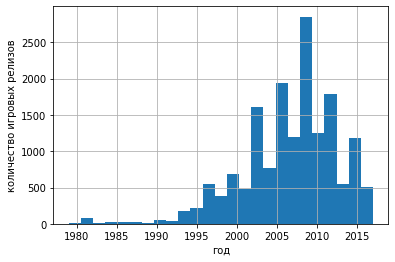

In [17]:
plt.xlabel("год")
plt.ylabel("количество игровых релизов")

data['year_of_release'].hist(bins = 25, range=(1979, 2017));


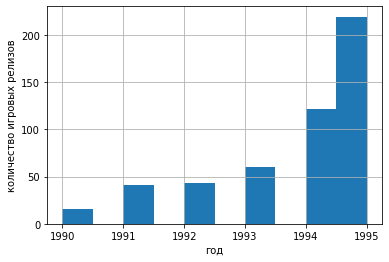

In [18]:
plt.xlabel("год")
plt.ylabel("количество игровых релизов")

data['year_of_release'].hist(bins = 10, range=(1990, 1995));

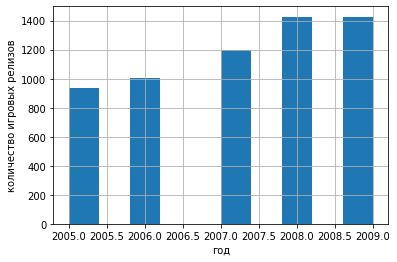

In [19]:
plt.xlabel("год")
plt.ylabel("количество игровых релизов")

data['year_of_release'].hist(bins = 10, range=(2005, 2009));

Знаковый период был с 2005 по 2009 года. В этом промежутке времени выпускалось наибольшее количество игр.

In [20]:
platforms_ascending = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top10_platforms = platforms_ascending.reset_index()
iloc_top10_platforms = top10_platforms.iloc[0:10]
top10_platforms = iloc_top10_platforms['platform'].unique()
platforms_ascending

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


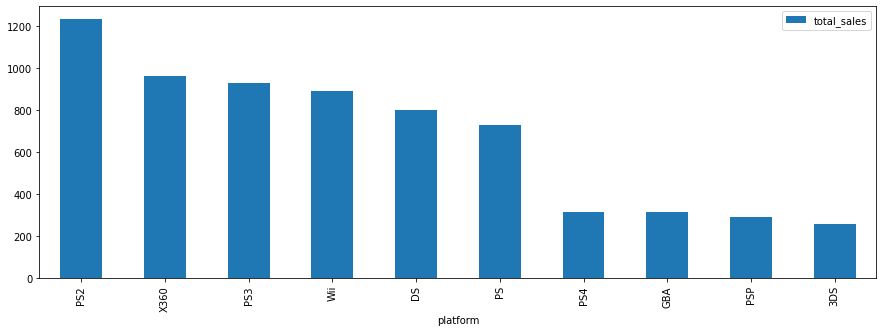

In [21]:
iloc_top10_platforms.plot(x="platform", y="total_sales", kind='bar', figsize=(15,5));

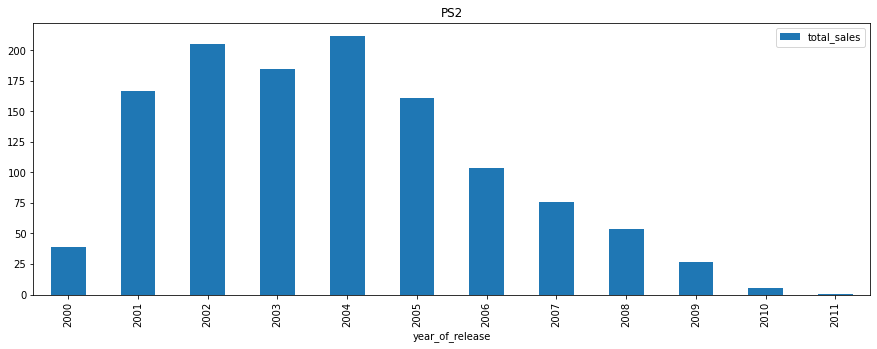

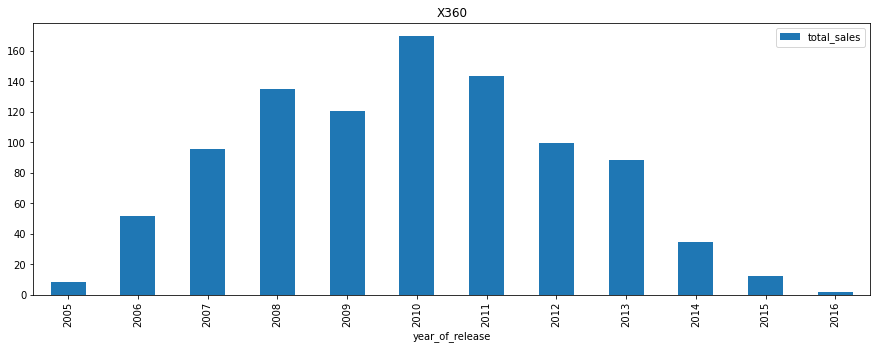

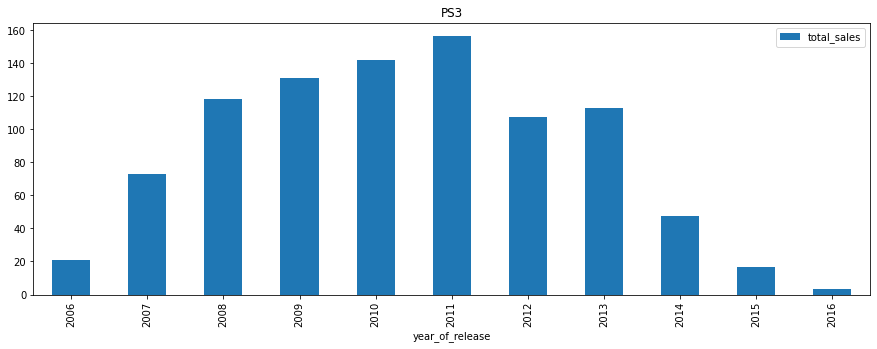

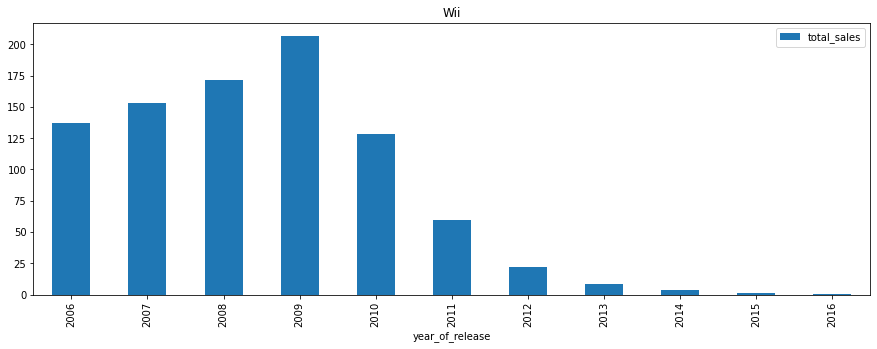

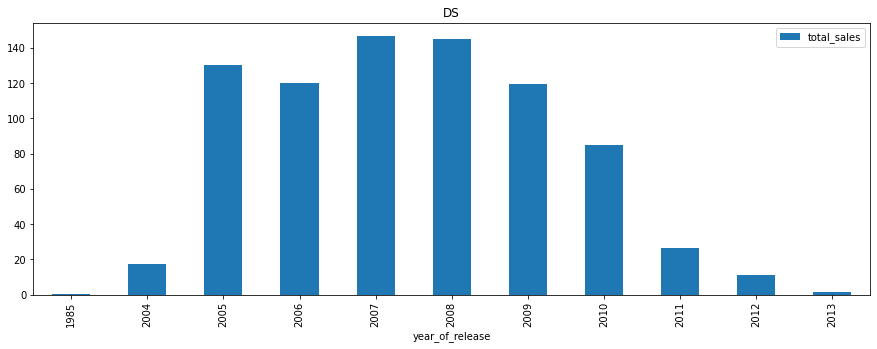

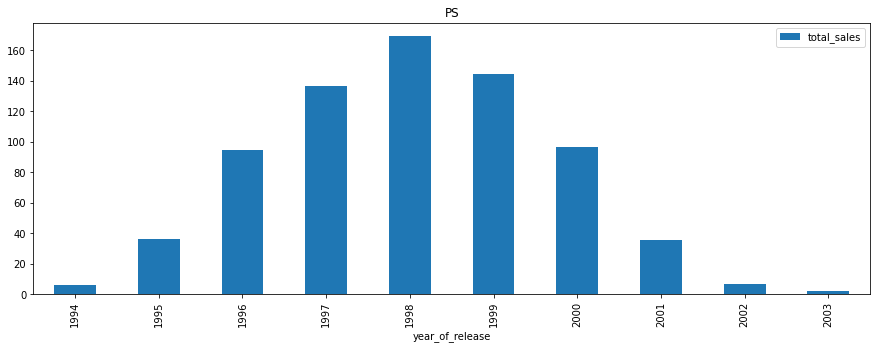

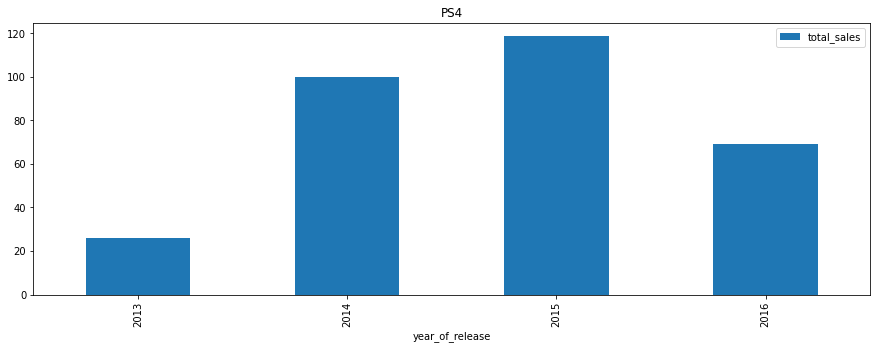

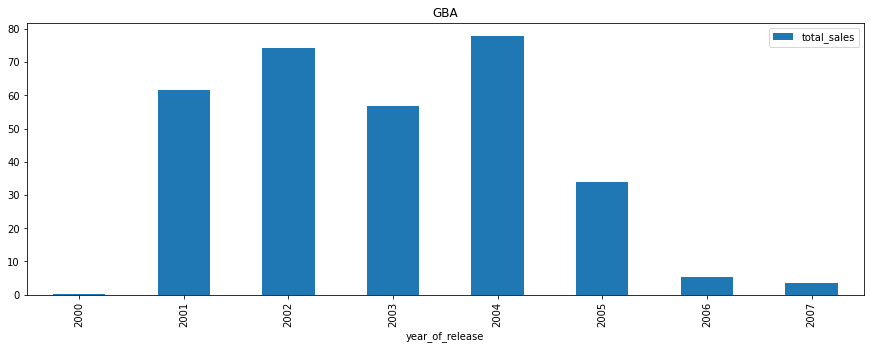

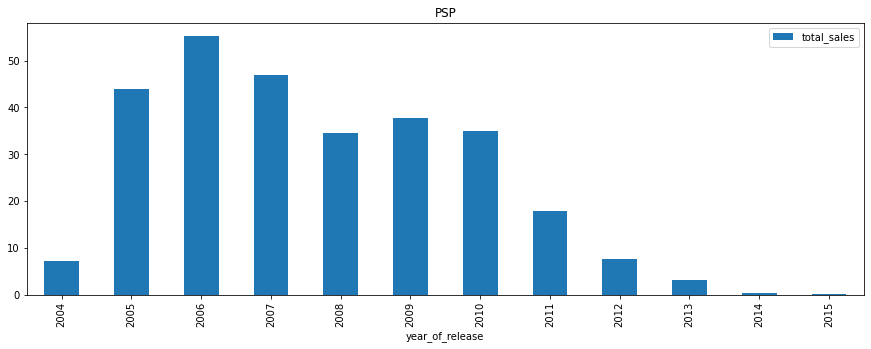

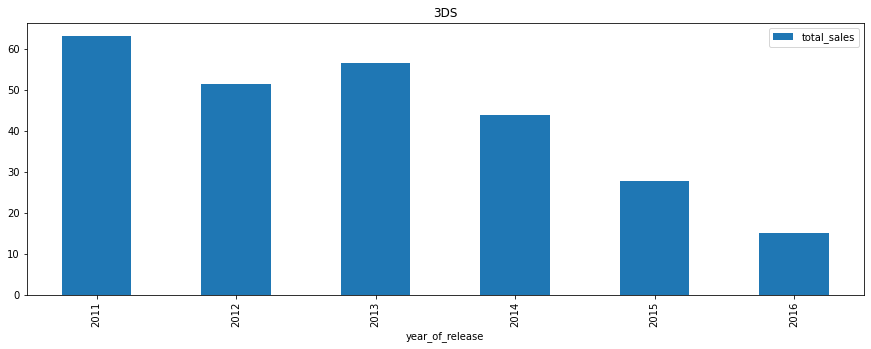

In [22]:
for platform in top10_platforms:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)

Средняя продолжительность существования платформ 10 лет. Большее количество появлилось в начале 2000-x, особенно в 2009 году.

Для более точного результата нужна большая выборка. Прогноз требуется сделать на 2017 год. Актуальный период с 2013 по 2016 года.

In [23]:
actual_data = data.query('year_of_release >= 2013') #возьмем все данные после 2013 года

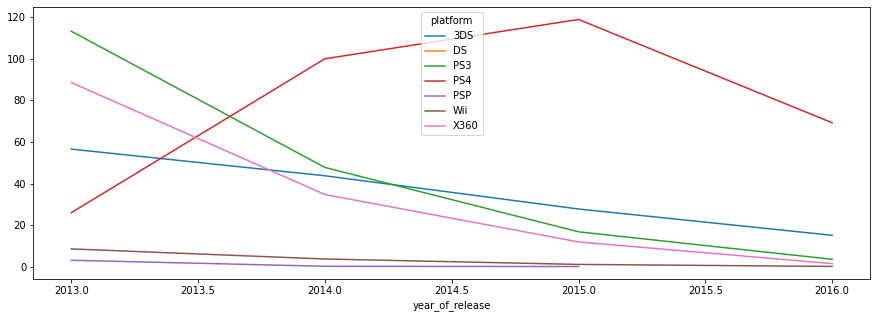

In [24]:
actual_data.query('platform in @top10_platforms').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5));

Прибыльные платформы на 2016 год: PS4, 3DS
Отрицательно прибыльные платформы на 2016 год: PSP, Wii, X360

Все игры на платформах идут на снижение по продажам. Продаются игры лучше те, которые имели недавний релиз. Чем дольше был выход, тем хуже продажи.

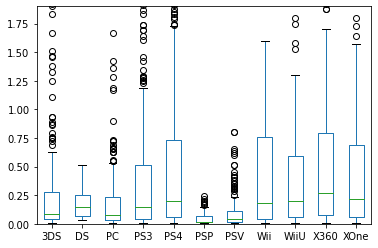

In [25]:
actual_data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,1.9));

На ящике с усами видно, что не были учтены консоли только набирающую популярность - XOne и WiiU. На ней было выпущено относительно мало игр, поэтому не включена в предыдущий график, но игры этой платформы очень хорошо продаются, потому что медианные значения PS4 и XOne почти совпадают. Добавим XOne в список потенциально прибыльных. Wii и PSP4 одинаковы, а X360 почти равна, но в 2016 году продажи Wii, X360 приблизились к 0, поэтому не учитываются.

Так как 2016 год ещё не закончился, то у нас есть много пропусков в данных, которые мы хотим коллерировать, поэтому лучше взять одну из популярных консоль, у которой нет данных в 2016. Это PS4

                    Диаграмма рассеяния для PS4


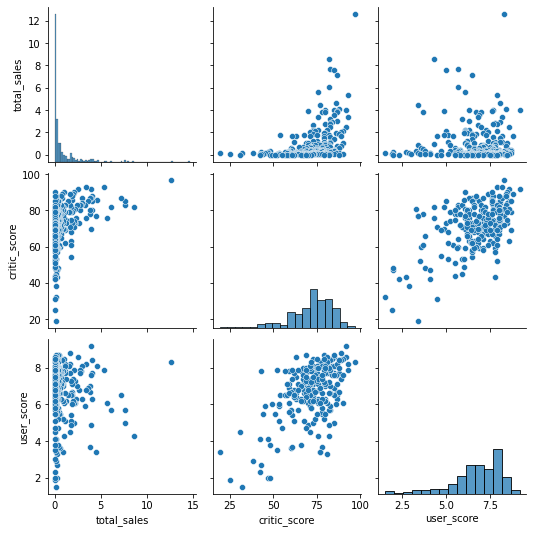

In [26]:
print('                    Диаграмма рассеяния для PS4')
sns.pairplot(data[data.platform == "PS4"][['total_sales', 'critic_score', 'user_score']])
plt.show()

Чем выше рейтинг, тем лучше игра, следовательно больше продаж. Также имеются "аномалии" - в столбце user_score есть игры, которые имеют высокую оценку пользователей, но при этом мало продались. Возможно обусловлено стоимостью игр.

In [27]:
print('         Матрица корреляций')
data[data.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

         Матрица корреляций


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Корреляция между total_sales и critic_score равна 0.4.
Корреляции между total_sales и user_score отсутствует.

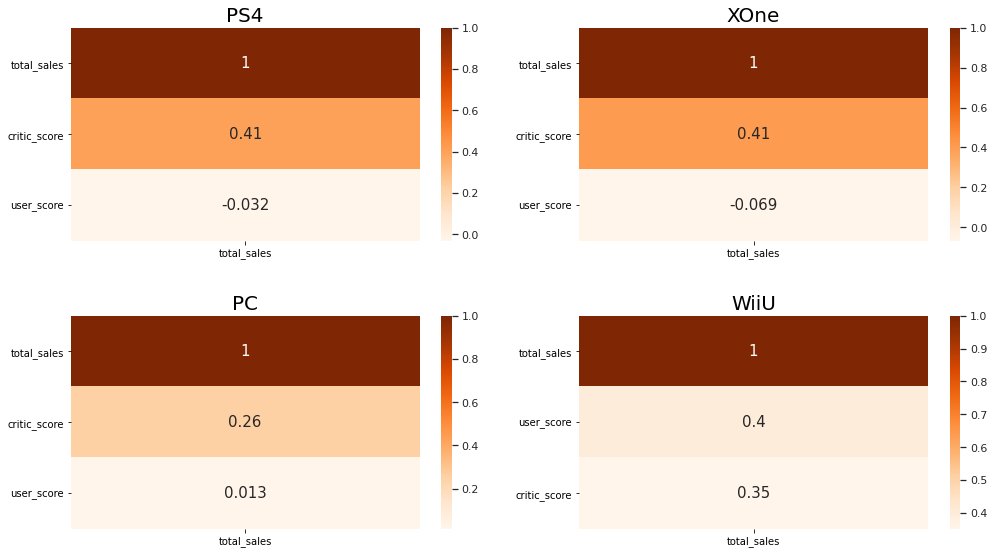

In [28]:
top_platforms = ['PS4','XOne','PC','WiiU']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = data[(data['platform'] == curr_platform) & (data['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="Oranges", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Здесь наблюдается значимость оценки пользователей.

In [29]:
print('    Популярность игровых жанров')
distr_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

    Популярность игровых жанров


,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Самые прибыльные жанры - Action, Sports, Shooter.
Наименее прибыльные жанры - Strategy, Puzzle.

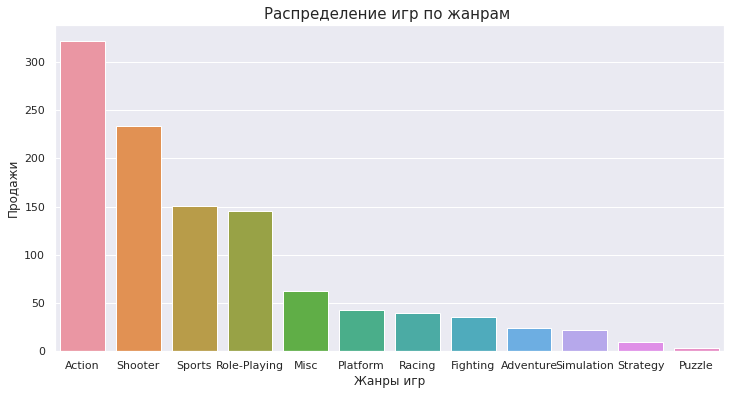

In [30]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи');

In [31]:
print('Cреднее значение продаж по жанрам')
distr_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

Cреднее значение продаж по жанрам


,genre,total_sales
0,Shooter,1.245882
1,Sports,0.703972
2,Platform,0.576081
3,Role-Playing,0.499623
4,Racing,0.469294
5,Fighting,0.441375
6,Action,0.420196
7,Misc,0.405290
8,Simulation,0.350968
9,Puzzle,0.186471


In [32]:
print('Медианное значение продаж по жанрам')
distr_genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

Медианное значение продаж по жанрам


,genre,total_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


In [33]:
print('Среднее значение продаж: ', data['total_sales'].mean())
print('Медианное значение продаж: ', data['total_sales'].median())

Среднее значение продаж:  0.5360234736073948
Медианное значение продаж:  0.16999999999999998


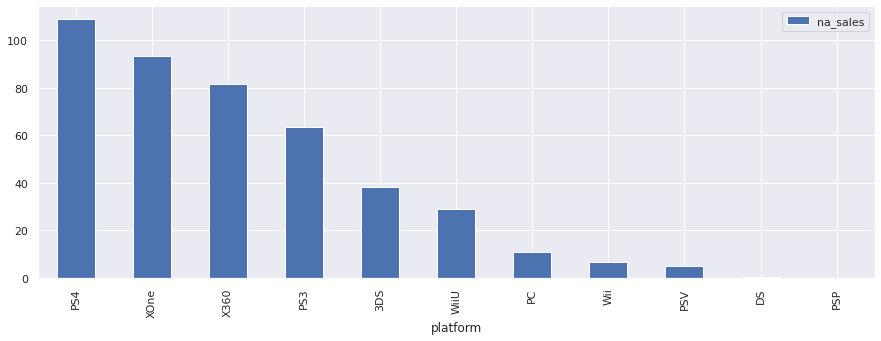

In [34]:
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5));

Пользователи Северной Америки больше всего предпочитают PS4 и XOne. Платформы PS, Wii, PSV - не пользуются популярностью.

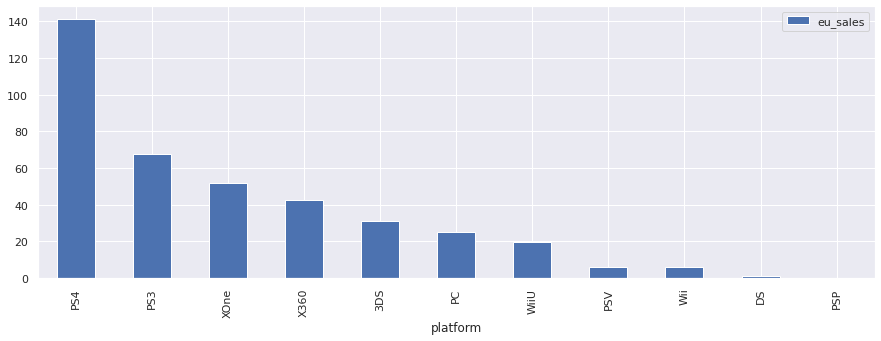

In [35]:
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5));

У пользователей Европы популярна PS4. В целом запросы такие же как у пользователей из Северной Америки.

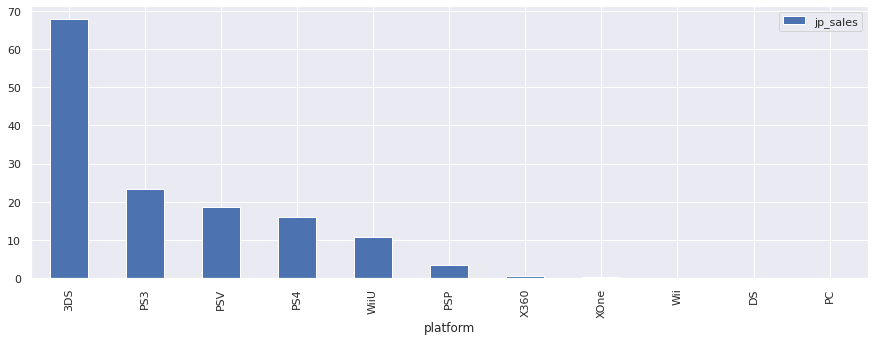

In [36]:
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5));

В Японии с доминирующем лидерством пользуется популярностью 3DS. PS4, XOne не имеют спроса.

Можно сделать общий вывод, что пользователи предпочитают играть на платформах своей же страны

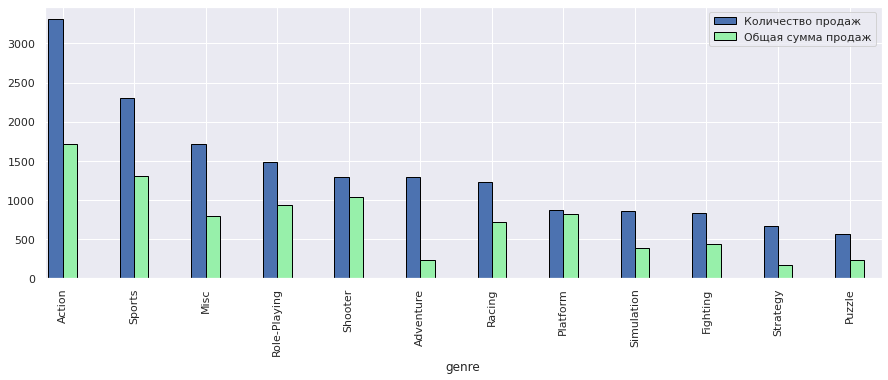

In [37]:
ax = plt.gca()

pivot = data.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж']);

Большей популярностью позьзуются игры в жанре Action, нынешние тенденции демонстрируются во всей развлекательной отрасли, например, киноиндустрия. Далее - Sports, здесь актуальные игры среди мужского населения такие как FIFA, PES). На третьем месте Misc, предпочитают зачастую дети и тинейджеры, которым нужно 'все и сразу'.

In [38]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:3]
    title_dict = {'na_sales': 'Продажи Северной Америки', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    color_dict = {'na_sales': 'pink', 'eu_sales': 'orange', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Cамые популярные платформы (топ-3)


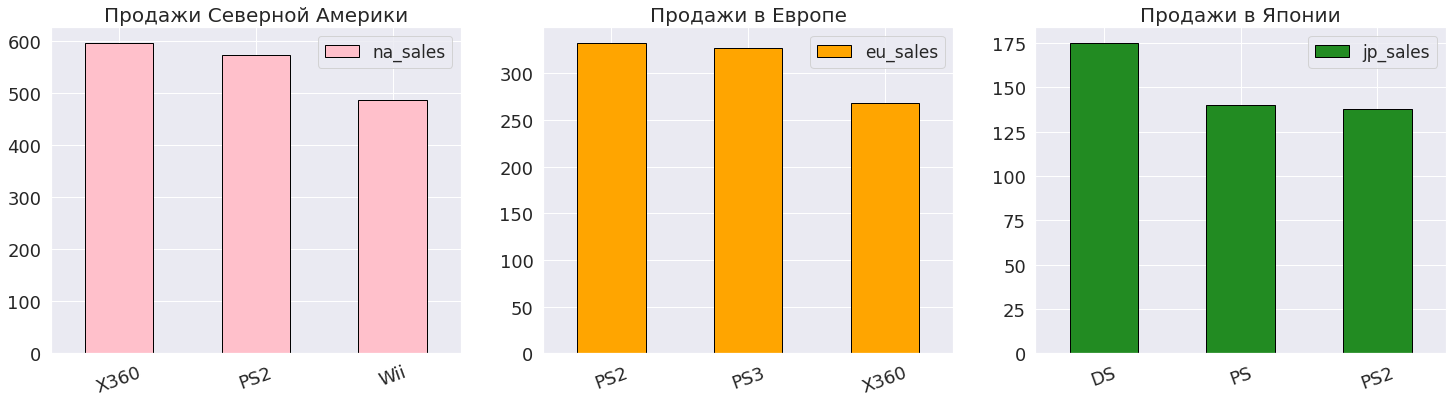

In [39]:
print ('Cамые популярные платформы (топ-3)')
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Северной Америке были самыми популярными X360, PS2 B Wii.
В Европе популярны PS2,pfntv PS3 и X360.
В Японии DS, PS, PS2.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Мы же уже определили топ5?)

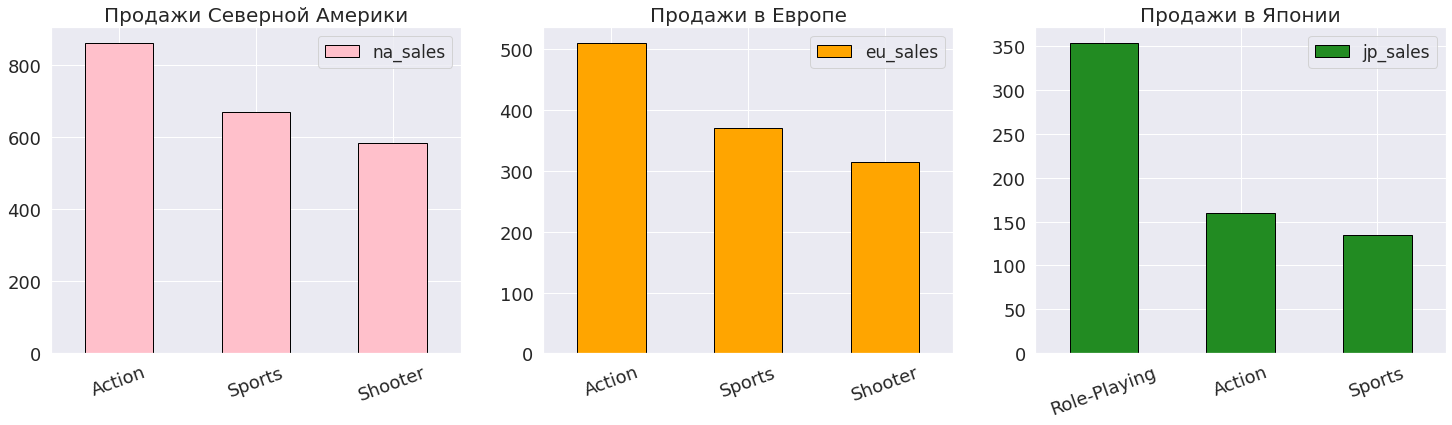

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

In [41]:
actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales')

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [42]:
actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales')

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [43]:
actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales')

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


Пользователи Европы и Северной Америки играют в целом в одни и те же консоли, популярны жанры - Action, Sports, Shooter. В Японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому они предпочитают жанр - Role-Playing и редко играют в игры с жанром - Puzzle.

In [44]:
ESRB = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79


In [45]:
ESRB_dict = {'E': 'Для всех','EC': '> 6 лет', 'E10+': '> 10 лет', 'M': '> 17 лет', 'T': '> 13 лет', 'AO': 'Для взрослых', 'RP': 'Рейтинг обсуждается', 'undefined': 'Не определен'}
data['ESRB_description'] = data[data['rating'].notnull()]['rating'].map(ESRB_dict)

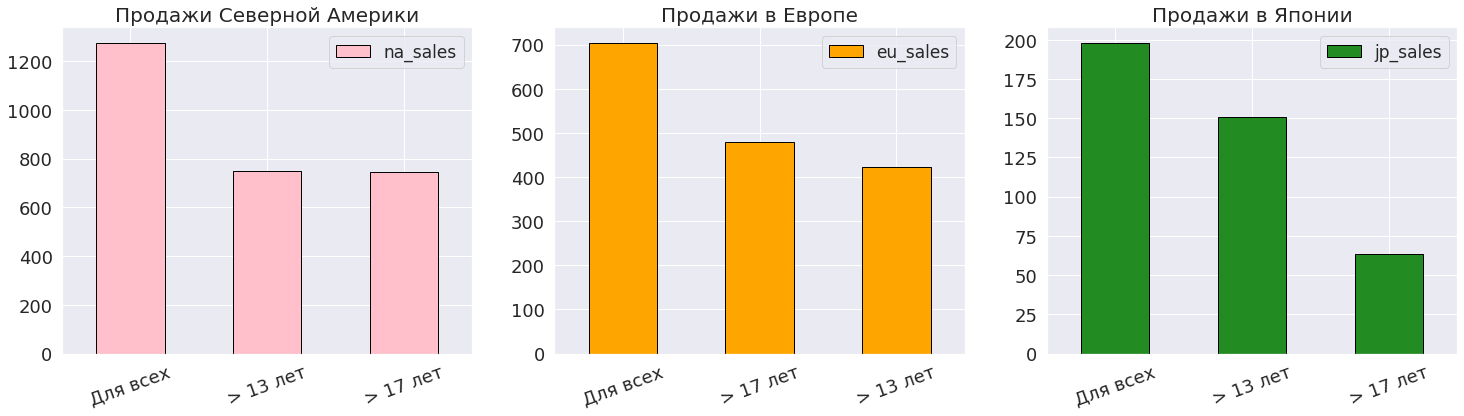

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

Северная Америка и Европа очень схожи. Большая часть выручки получено с игр с рейтингом "Для всех", а далее по возрастному цензеру.
В Японии на первом месте "для всех", а затем значительная разница между >13 и > 17.
При этом следует учитывать, что компания ESRB американская и что-то могло не учитываться в данных, либо действия в чьих-либо интересах.

1 гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2 гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [47]:
XOne = actual_data[(actual_data['platform'] == 'XOne') &  (actual_data['user_score'] > 0)]['user_score']#.mean().round()
PC = actual_data[(actual_data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]['user_score']#.mean().round()
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.2696774193548395


H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [48]:
#проверяем первую гипотезу

alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: 1 гипотеза подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [49]:
Action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]['user_score']#.mean().round()
Sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]['user_score']#.mean().round()
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


In [50]:
#проверяем вторую гипотезу

alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод: 2 гипотеза подтвердилась. Средние пользовательские рейтинги жанров Action и Sports разные

    Было проведено исследование, чтобы выявить определяющие успешность игры закономерности. Входные данные - данные до 2016 года. Результаты исследования будут учтены для прогнозирования потенциально популярного продукта и планирования рекламных кампаний.
    Перед проведение исследования были поставлены две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

    В результате удалось достигнуть следующих итогов:
Критерии определяющие успешность игры:
1. Регион
2. Рейтинг ассоциации, определяющей возрастной рейтинг компьютерных игр
3. Платформа, которая наиболее распространена в данном регионе
4. Жанр
5. Рейтинг критиков (влияет на количество продаж во всех регионах)

    Игры, которые будут продаваться в Северной Америке лучше всего:
ESRB: E, M, T
Платформы: PS4, XOne
Жанры: Action, Sports, Shooter

    Игры, которые будут продаваться в Европе лучше всего:
ESRB: E, M, T
Платформы: в PS4, PS3, XOne
Жанры: Action, Sports, Shooter

    Игры, которые будут продаваться в Японии лучше всего:
ESRB: E, T, M
Платформы: 3DS, PS3
Жанры: Role-Playing, Action, Sports

    Гипотеза 1 подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    Гипотеза 2 подтвердилась. Средние пользовательские рейтинги жанров Action и Sports разные.